## Detalhes técnicos:

Transformação PCA: A descrição dos dados diz que todos os recursos sofreram uma transformação PCA (técnica de Redução de Dimensionalidade) (Exceto tempo e quantidade).

Dimensionamento: Para implementar uma transformação PCA os recursos necessitam de ser previamente dimensionados. Neste caso, todos os recursos V foram dimensionados.

### Importando Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
import numpy as np
sys.path.append(os.path.join(os.getcwd(), 'etl', 'pipeline'))


### Extrair dataset


In [3]:
#!{sys.executable} -m pip install python-dotenv
from extract import download_dataset

dataset_name = "mlg-ulb/creditcardfraud"
dataset_path = "data"
download_dataset(dataset_name, dataset_path)

Dataset mlg-ulb/creditcardfraud baixado com sucesso em `data!


In [4]:
data = pd.read_csv('data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Análise do Dataset

Não há valores faltantes

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


O valor da transação é relativamente pequeno. A média de todas as montagens realizadas é de aproximadamente 88 dólares.

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Qual o percentual de transações que são fraudes?

In [8]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

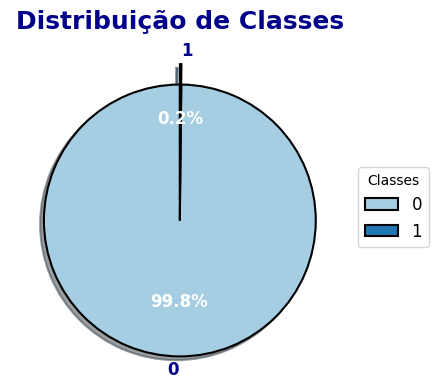

In [9]:
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

value_counts = data['Class'].value_counts()
colors = plt.cm.Paired(range(len(value_counts)))

explode = [0.1 if i == value_counts.idxmax() else 0.05 for i in value_counts.index]

wedges, texts, autotexts = ax.pie(
    value_counts,
    labels=value_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5},
    textprops=dict(color="darkblue", fontsize=12)
)

plt.setp(autotexts, size=12, weight="bold", color="white")
plt.setp(texts, size=12, weight="bold")
ax.legend(wedges, value_counts.index,
          title="Classes",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12)

ax.set_title("Distribuição de Classes", fontsize=18, fontweight='bold', color="darkblue")

plt.tight_layout()

plt.show()

A maioria das transações foi "Não Fraude" em (99,8%) das vezes, enquanto as transações "Fraude" ocorrem (0,2%) das vezes no dataframe.

### Distribuições

C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\2925254974.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\2925254974.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1]

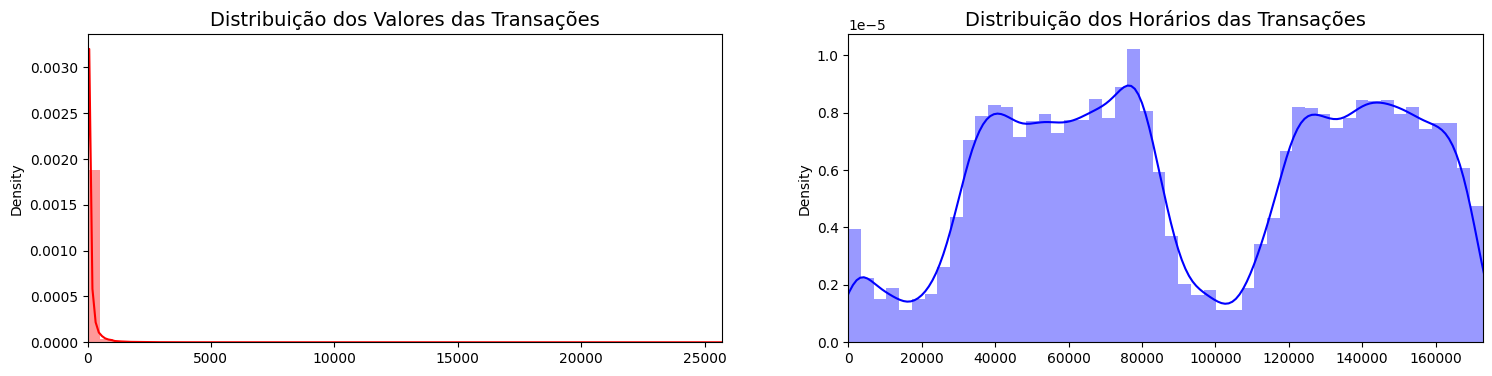

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

# armazena os valores das colunas em uma variável 

amount_val = data['Amount'].values 
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribuição dos Valores das Transações', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribuição dos Horários das Transações', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

### Dimensionamento e Distribuição

O tempo e o valor devem ser dimensionados como as outras colunas. Também é necessário criar uma subamostra do dataframe para termos uma quantidade igual de casos de Fraude e Não Fraude, ajudando os algoritmos a compreenderem melhor os padrões que determinam se uma transação é uma fraude ou não.

Neste cenário, a subamostra será um dataframe com uma proporção de 50/50 de transações fraudulentas e não fraudulentas. Isto significa que a subamostra terá a mesma quantidade de transações fraudulentas e não fraudulentas. Isso ajuda a melhorar o dataset desbalanceado.

RobustScaler ajuda a tornar os dados mais estáveis, principalmente quando há valores extremos (outliers)

- reshape(-1, 1) serve para transformar uma sequência de números (um vetor de 1D) em uma matriz com uma coluna e várias linhas, ou seja, uma matriz de 2 dimensões. Isso é necessário porque a maioria dos algoritmos de aprendizado de máquina e pré-processamento, como o RobustScaler, espera dados no formato de matriz. Isso é necessário para que as funções de pré-processamento, como o fit_transform, funcionem corretamente

In [11]:
# !{sys.executable} -m pip install scikit-learn
from transform import transform_data

data = transform_data(data)
data.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting Dataset

StratifiedShuffleSplit: Uma maneira de dividir os dados em múltiplos conjuntos de treino e teste, mas garantindo que a distribuição das classes (fraude e não fraude) seja proporcional em ambos os conjuntos.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

X = data.drop('Class', axis=1)
y = data['Class']

- StratifiedKFold: Divide os dados de forma estratificada em 5 partes, nesse caso as distribuições das classes são proporcionais em cada divisão
- shuffle=False: Os dados não serão embaralhados antes de dividir. Caso fosse True, os dados seriam misturados aleatoriamente.

In [13]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)

    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [14]:
# Transforma em Array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [15]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Distribuicoes: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


Distribuicoes: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random Under-Sampling

Remover dados para termos um conjunto de dados mais equilibrado e assim evitar que os nossos modelos sofram overfitting. A primeira coisa que temos de fazer é determinar o quão desequilibrada está a nossa classe. Depois de determinarmos quantas instâncias são consideradas transações fraudulentas devemos trazer as transações não fraudulentas para o mesmo valor das transações fraudulentas. Após a implementação desta técnica, temos uma subamostra do nosso dataframe com um rácio de 50/50 em relação às nossas classes. Assim, o próximo passo que implementaremos é embaralhar os dados para ver se os nossos modelos conseguem manter uma certa precisão sempre que executarmos este script.

In [16]:
# embaralhando as linhas do dataframe

data = data.sample(frac=1)

# filtrando as classes de fraude e não fraude

fraude = data.loc[data['Class'] == 1]
nao_fraude = data.loc[data['Class'] == 0][:492] # vai conter somente as 492 linhas e isso é feito para igualar o numero de fraudes e nao fraudes

In [19]:
# criando dataframe balanceado

normal_distributed = pd.concat([fraude, nao_fraude]) # unidas em um unico dataframe

# embaralhando novamente

normal_distributed = normal_distributed.sample(frac=1, random_state=42)

normal_distributed.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
204352,-0.269825,0.593863,-0.540177,0.201709,0.532095,-0.723584,1.039325,-0.906201,0.586026,0.054348,...,-0.120801,-0.137097,-0.604102,0.044867,-0.384331,-0.630809,0.126225,0.067990,0.160728,0
276071,-0.028645,0.965601,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,...,0.037438,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,1
227257,0.971984,0.708514,-2.864946,2.577548,0.058654,-1.028033,-0.484873,1.943509,-3.626687,-10.270984,...,2.311002,-5.490143,0.095864,0.578397,0.632437,-0.299829,0.024133,-0.091882,0.152399,0
43624,0.243834,-0.506467,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,...,0.644993,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,1
15566,1.089779,-0.678239,-23.237920,13.487386,-25.188773,6.261733,-17.345188,-4.534989,-17.100492,15.374630,...,1.630787,1.769708,-1.691973,-1.045673,0.143386,1.611577,-0.221576,1.481233,0.438125,1


Distribuicao das Classes na subamostra
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\1639523048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=normal_distributed, palette=colors)
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\1639523048.py:5: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(x='Class', data=normal_distributed, palette=colors)


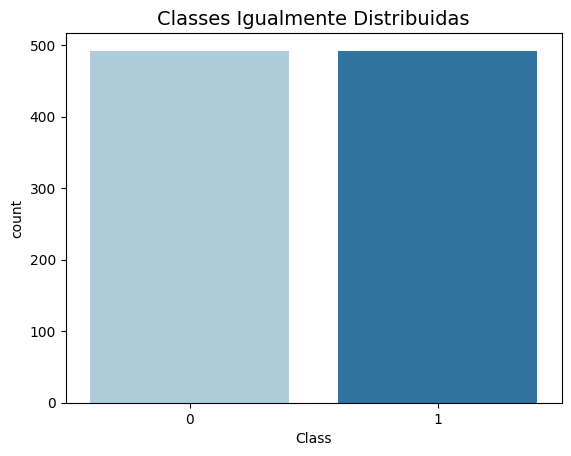

In [25]:
print("Distribuicao das Classes na subamostra")

print(normal_distributed['Class'].value_counts() / len(normal_distributed))

sns.countplot(x='Class', data=normal_distributed, palette=colors)
plt.title('Classes Igualmente Distribuidas', fontsize=14)
plt.show()

### Matriz de Correlação

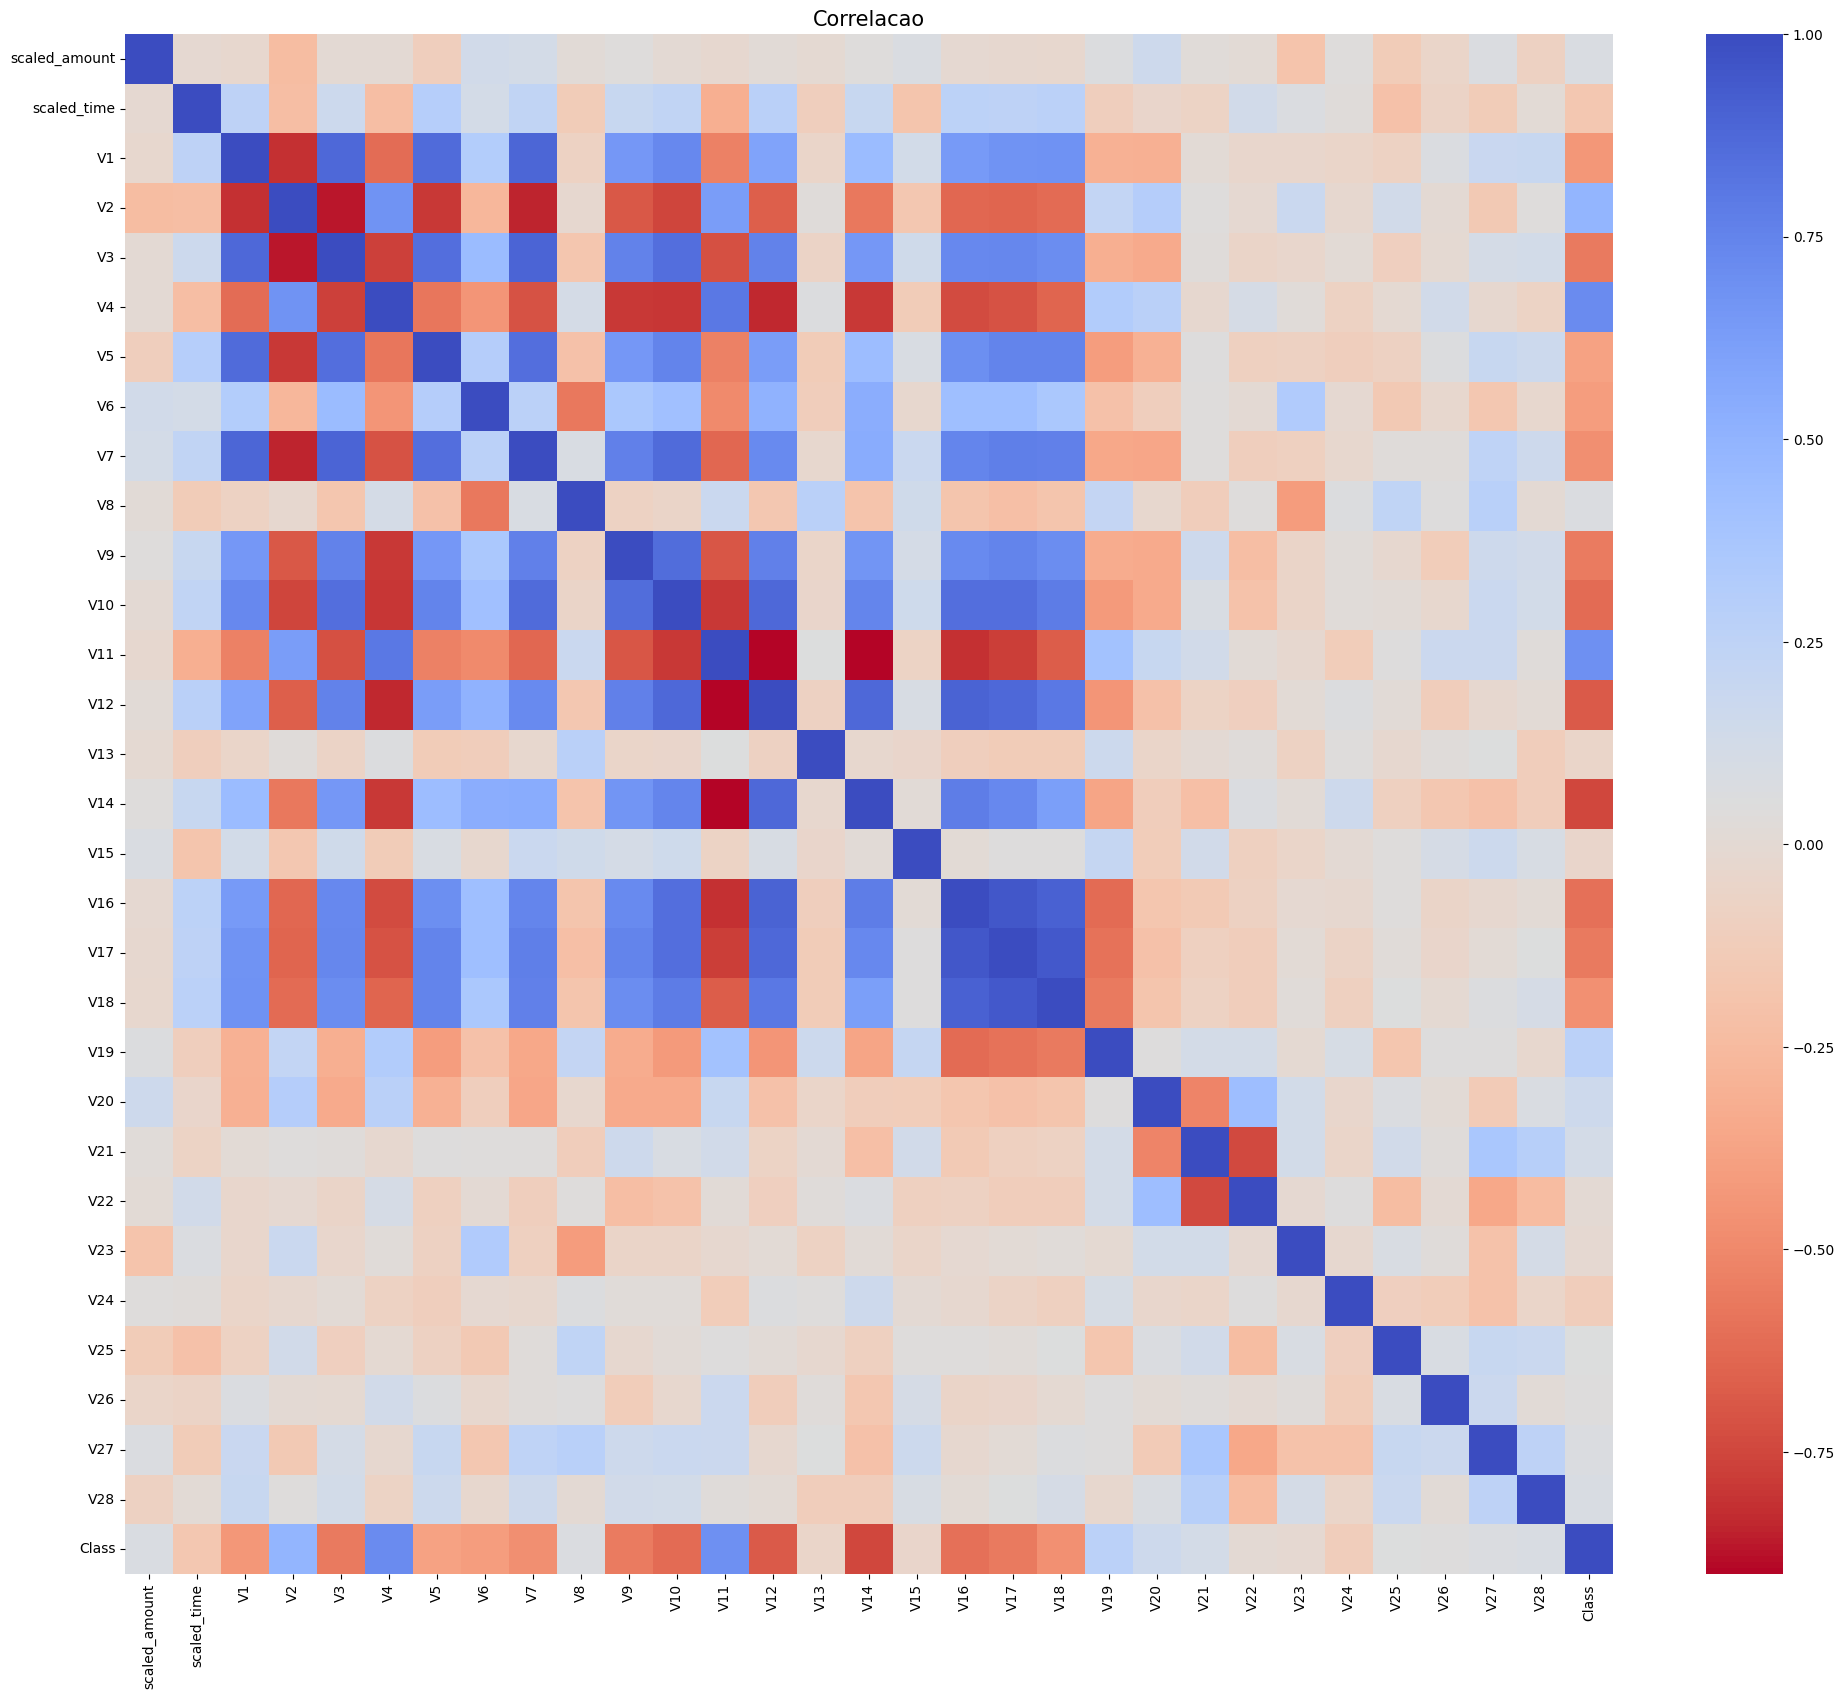

In [39]:
plt.figure(figsize=(24, 20))

corr = normal_distributed.corr()

sns.heatmap(corr, cmap='coolwarm_r', annot=False)

plt.title('Correlacao', fontsize=15)
plt.show()

C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\2857674271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=normal_distributed, palette=colors, ax=axes[0])
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\2857674271.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x="Class", y="V17", data=normal_distributed, palette=colors, ax=axes[0])
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\2857674271.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=normal_distributed, palette=colors, ax=axes[1])
C:\User

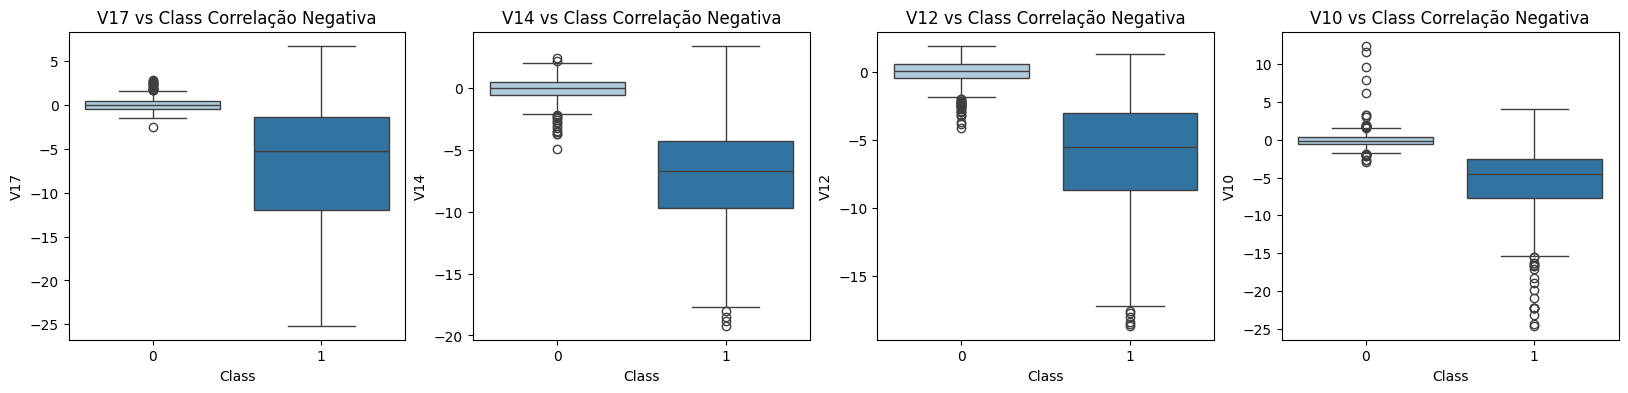

In [37]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=normal_distributed, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Correlação Negativa')

sns.boxplot(x="Class", y="V14", data=normal_distributed, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Correlação Negativa')


sns.boxplot(x="Class", y="V12", data=normal_distributed, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Correlação Negativa')


sns.boxplot(x="Class", y="V10", data=normal_distributed, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Correlação Negativa')

plt.show()

C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\932538399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=normal_distributed, palette=colors, ax=axes[0])
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\932538399.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.boxplot(x="Class", y="V11", data=normal_distributed, palette=colors, ax=axes[0])
C:\Users\BeatrizAlmeida\AppData\Local\Temp\ipykernel_14040\932538399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=normal_distributed, palette=colors, ax=axes[1])
C:\Users\Be

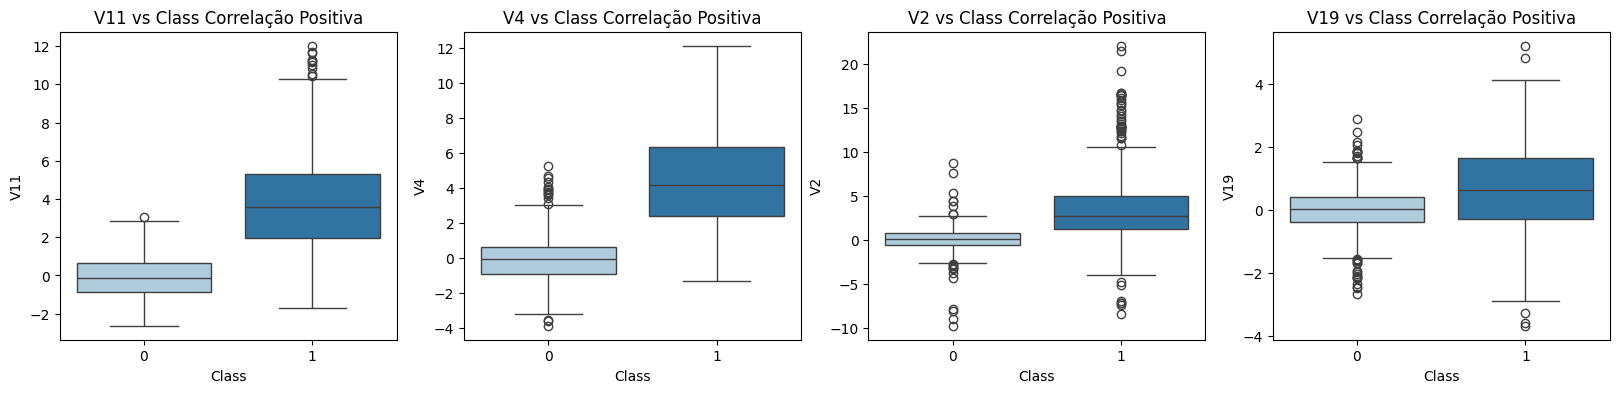

In [38]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V11", data=normal_distributed, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Correlação Positiva')

sns.boxplot(x="Class", y="V4", data=normal_distributed, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Correlação Positiva')


sns.boxplot(x="Class", y="V2", data=normal_distributed, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Correlação Positiva')


sns.boxplot(x="Class", y="V19", data=normal_distributed, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Correlação Positiva')

plt.show()